# II - Traitement radar

## Généralités
Maintenant que la partie signal à l'émission est comprise, qu'en est-il de la réception ? Une fois que notre forme d'onde a été émise, celle-ci parcourt une certaine distance, $R$, à la vitesse de la lumière, $c$ (onde électromagnétique), jusqu'à ce qu'elle rencontre une cible potentielle. Elle est alors réfléchie pour revenir au radar et être traitée.

<div>
    <img src = "Images/radar_scheme_FR.png" width="400" style="margin:auto"/>
</div>
<div style="text-align:center;"><b>Principe du radar</b></div>

Le signal reçu, $r(t)$, correspond à une **version atténuée, bruitée et retardée** du signal d'origine, $s(t)$. Il est exprimé comme

$$
r(t)=A_r u(t-\tau(t))e^{2i\pi f_c (t-\tau(t))}+w(t),
$$
où $\tau(t)$ représente **le retard** de la cible et $A_r$ son amplitude. On désigne par $w(t)$ le bruit blanc Gaussien qui s'ajoute au signal et le parasite.

::::{note} Remarque
 Dans la suite, le facteur d'atténuation $A_r$ vaut $1$ et le bruit n'est pas modélisé sauf mention contraire. On s'amusera à le modéliser une fois les outils pris en mains.
::::

Il est alors possible de déterminer la position et la vitesse de la cible en étudiant le signal reçu. Le retard (aussi appelé delai) $\tau(t)$ représente le temps mis par le signal pour parcourir le trajet aller-retour entre le radar et la cible. Cependant, il dépend du temps car influencé par le mouvement relatif entre le radar et la cible. Et oui, souvent les cibles bougent et se voient associées d'une vitesse radiale $v_r$ (cf section [Que voit le radar ?](vitesse)). 

Pour le moment on va rester simple et considèrer une cible avec une vitesse radiale constante, autrement dit pas d'accélération. Ainsi, le retard peut s'écrire avec une approximation au premier ordre telle que 

$$
\tau(t) = \tau_0 + \frac{2v_r}{c}t,
$$
où $\tau_0$ est le délai initial correspondant à 
$$
\tau_0 = \frac{2R_0}{c},
$$
avec $R_0$ la distance initiale. On peut noter le facteur $2$ présent car le signal fait le trajet aller-retour. Le délai $\tau(t)$ peut être assimilé à une contraction/dilatation du signal retourné qui affecte aussi bien le signal en bande de base que la fréquence porteuse. L'équation précédente de $r(t)$ peut d'ailleurs s'écrire :
$$
r(t)=A_r u\left(\left(1 - \frac{2v_r}{c}\right)t-\tau_0\right)e^{2i\pi f_c t}e^{-2i\pi f_c\tau_0}e^{-2i\pi f_c \frac{2v_r}{c}t}+w(t).
$$
Dans la majorité des cas en radar, on fait une hypothèse "grossière" qui consiste à considérer la vitesse radiale $v_r$ très petite devant la vitesse de la lumière et ainsi négliger son impact sur le signal en bande de base. 
::::{caution} Aparté préventive
On dit "grossière" dans le sens où physiquement, la vitesse peut très rapidement avoir un impact sur le signal en bande de base.  Négliger cet impact revient donc à faire une erreur sur la réponse réelle de la cible. On pourra voir son impact plus tard.
::::
Le facteur $\left(1 - \frac{2v_r}{c}\right)$ est responsable de la contraction/dilatation du temps dans le domaine temporel, mais vu que le ratio $\frac{2v_r}{c}<<1$, on le néglige sur la durée d'une impulsion dans la plupart des applications radar et le retard devient juste $\tau_0$. Par contre, l'impact de $v_r$ sur la fréquence porteuse, lui, n'est pas négligeable et est responsable du décalage Doppler $\nu_d$ donné par
$$
\nu_d=-\frac{2v_r}{c}f_c.
$$
Le signal reçu s'écrit finalement
$$
r(t)=A_r u(t-\tau_0)e^{2i\pi f_c t}e^{2i\pi \nu_d t}+w(t).
$$


(vitesse)=
## Explications Vitesse radiale 

🛠️ EN CHANTIER 🛠️

<img src = "Images/Radial_velocity_scheme.png"   width="600" style="margin:auto"/>

## Le filtre adapté

Pour commencer l'étude de ce signal reçu, on va dire dans un premier temps que la cible est du genre coopérative et que cette dernière est fixe ($v_r=0$). Autrement dit on ne s'intéresse qu'au retard $\tau_0$ ici (le Doppler étant nul par hypothèse). L'objectif va être de retrouver ce retard et la distance associée à l'aide du **filtre adapté** (*Matched Filter* en anglais). 

En radar, **le filtre adapté permet de détecter et de localiser une cible potentielle en maximisant le rapport signal à bruit SNR** (*Signal-to-Noise Ratio* en anglais). Alors dit comme ça, tu dois sûrement regarder la phrase avec de grand yeux en te demandant ce qui se passe. 

On va déjà faire une petite aparté pour expliquer ce qu'est le SNR. Ce rapport signal à bruit représente le ratio entre la puissance de ton signal et la puissance du bruit. On l'exprime très souvent en décibels $[dB]$ et il permet d'indiquer la qualité du signal étudié. Plus ton SNR est bas, plus ton signal est bruité, de mauvaise qualité si tu préfères et inversement si ce SNR est haut. Une image valant mille mots, tu peux contempler le SNR sur les figures suivantes.


In [ ]:
%matplotlib ipympl 
%run "Codes\Visualise_SNR.py"

Maintenant, revenons au filtre adapté. Il s'agit tout simplement de la convolution du signal reçu avec le signal de référence (=le signal émis). En faisant ainsi, on cherche à faire correspondre le signal de référence avec sa version retardé contenue dans le signal reçu. On atteint alors un maximum au retard $\tau$. Mathématiquement, on peut l'écrire comme suit :

$$
\hat{\tau}=\underset{\tau}{\textrm{arg max}}~\frac{\left|\int_\mathbb{R} u(t-\tau_0)h(\tau-t)dt\right|^2}{\mathbb{E}\left [\left|\int_\mathbb{R} w(t)h(\tau-t)dt\right|^2 \right]}.
$$

Pour rappel/préciser :
- $w(t)$ désigne le bruit blanc Gaussien
- $\hat{\tau}$ représente l'estimateur du délai (Le $\hat{.}$ est souvent utilisé pour désigner les estimateurs)
- $u(t-\tau_0)$ est le signal en bande de base
- $\mathbb{E}[.]$ représente l'opérateur de l'espérance
- $h$ est un filtre que l'on cherche à optimiser

Le filtre adapté est alors la solution 

$$
h(t)=Cu^*(-t),
$$

où $C$ est une constante arbitraire souvent égale à $1$. On notera que $u^*(-t)$ étant non causal, une version décalée $u^*(T-t)$ est généralement considérée. 

Tu peux avoir un premier aperçu de ce que donne le filtre adapté dans la <a href="https://www.youtube.com/watch?v=yewGWtzQKsw" target="_blank">vidéo</a> suivante.

Alor comment 

Comme le chirp n'a plus aucun secret pour toi, tu vas essayer de reproduire 

## La Fonction d'Ambiguïté

Désormais les cibles vont êtres moins coopératives, il faut à un moment donné prendre en compte leurs vitesse radiales $v_r$ et le décalage Doppler $\nu_d$ que cela induit. Ce décalage Doppler a en effet la fâcheuse tendance de détériorer la réponse de notre filtre adapté qui est optimisé pour un Doppler nul. Pour observer l'impact de ce décalage Doppler sur la sortie du filtre adapté pour une forme d'onde donnée, on peut calculer ce qu'on appelle la **Fonction d'Ambiguïté** (*Ambiguity Function* en anglais). Cette fonction représente la réponse temps-fréquence du filtre adapté pour un signal reçu avec un retard $\tau$ et un Doppler $\nu_d$ et s'écrit 🕮[1]:

$$
\chi(\tau,\nu_d) = \int_{-\infty}^{+\infty} u(t) u^*(t+\tau)e^{2i\pi\nu_d t}dt
$$

Encore une fois le Levanon 🕮[1] est plutôt complet sur ce sujet donc je t'invites vivement à lire la section correspondante ainsi que celle concernant le chirp avant de passer à la suite car après ça, c'est à ton tour d'essayer d'obtenir ta fonction d'ambiguïté pour un chirp.

::::{hint} Démarche
Tu dois voir la fonction d'ambiguïté comme une collection de filtres adaptés. Avec le filtre adapté de base, tu testais toutes les hypothèses de retard $\tau$ pour **UNE** hypothèse Doppler $\nu_d=0$. Maintenant, tu dois juste considérer l'ensemble des Dopplers possibles sur une plage $[-B, B]$.
::::


C:\Users\atorre\WPy64-31241\notebooks\docs\Notebook\Chapitres\Codes\AMBG_chirp.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  Mat_chirpconj[k,:] = np.conj(chirp)*np.exp(2j*np.pi*time*doppler[k]);
C:\Users\atorre\WPy64-31241\notebooks\docs\Notebook\Chapitres\Codes\AMBG_chirp.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  Mat_chirp[k,:] = chirp;


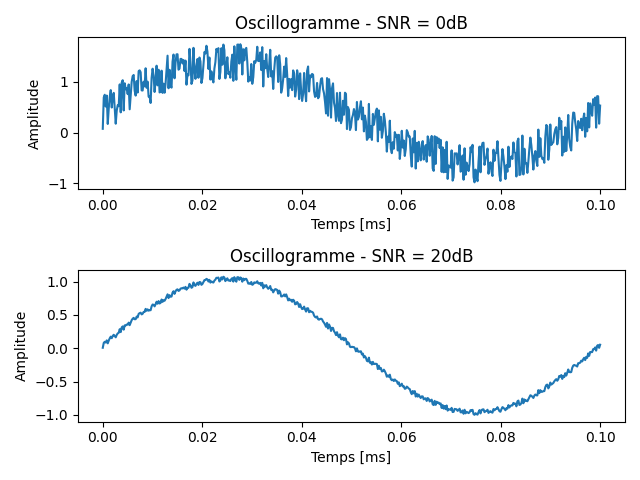

In [17]:
#Ton code
%matplotlib ipympl
%run "Codes/AMBG_chirp.py"

<details>
    <summary><b>Aide</b></summary>
    - Si tu veux vérifier ce que tu dois obtenir, charges la commande suivante dans la cellule code au-dessus
    <br>
    <b>%matplotlib ipympl <br>
       %run "AMBG_chirp.py"</b>
    <br>
    - Si tu veux voir comment la fonction est construite, pareil avec cette commande. <b><span style="color:red">!! ATTENTION !!</span></b> la commande effacera tout ce qui est présent dans ta  cellule
    <br>
    <b>%matplotlib ipympl <br>
       %load "AMBG_chirp.py"</b>
</details>

## Range-Doppler

Jusqu'à maintenant on ne considérait qu'une impulsion mais un radar émet ce qu'on appelle un train d'impulsions. Le radar transmet donc périodiquement des impulsions identiques de durées $T$ séparées par une Période de Répétition des Impulsions $T_r$ (PRI - Pulse Repetition Interval en anglais). Le schéma suivant illustre le cas pour une séquence de chirps.

<div>
    <img src="Images/Pulsetrain_scheme.png" width="400" style="margin:auto"/>
</div>



::::{hint} Pour ta culture G
Radar est un acronyme pour RAdio Detection And Ranging.  
::::

# Test Hypothèse - Détection

# Bibliographie

  [1] Levanon, Nadav, and Eli Mozeson. Radar Signals. J. Wiley, 2004.
